# 1. Import Library

In [305]:
import os
from tqdm import tqdm
import zipfile
import wget
import opendatasets
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [306]:
os.environ['Your Kaggle username:'] = 'teguhpermana'
os.environ['Your Kaggle key:'] = '70dafea2a31376afc04704d9a2e705a5'

# 2. Load Data

In [307]:
if os.path.exists('./diabetes-dataset/diabetes.csv'):
    print('File already exists')
else:
    opendatasets.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset', data_dir='.')

File already exists


In [308]:
df = pd.read_csv(r'diabetes-dataset/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Understanding Data

**Sumber**: [Kaggle - Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

## Keterangan Informasi Attribute 

| Attribute                   | Keterangan                                                   |
|-----------------------------|--------------------------------------------------------------|
| **Pregnancies**             | resentasi jumlah kehamilan                           |
| **Glucose**                 | representasi tingkat glukosa dalam darah                |
| **BloodPressure**           | representasi pengukuran tekanan darah                   |
| **SkinThickness**           | representasi ketebalan kulit                            |
| **Insulin**                 | representasi tingkat insulin dalam darah                |
| **BMI**                     | representasi indeks massa tubuh                         |
| **DiabetesPedigreeFunction**| representasi persentase diabetes                        |
| **Age**                     | representasi umur                                       |
| **Outcome**                 | representasi hasil akhir: 1 adalah diabetes dan 0 adalah tidak diabetes |



In [309]:
def data_understanding(df):
    print('\nData Info:\n')
    df.info()
    print('\nJumlah Baris : ', df.shape[0])
    print('\nJumlah Kolom  : ', df.shape[1])
    print('\nMissing Value:\n', pd.DataFrame({'Missing Value': df.isnull().sum()}))
    print('\nDuplicate Data:\n', df[df.duplicated()])
    print('\nStatistik Data:\n', df.describe())
data_understanding(df)


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Jumlah Baris :  768

Jumlah Kolom  :  9

Missing Value:
                           Missing Value
Pregnancies                           0
Glucose                               0
BloodPressure                         0
SkinThick

# 4. Exploratory Data Analyst

## 4.1. Outlier Checking

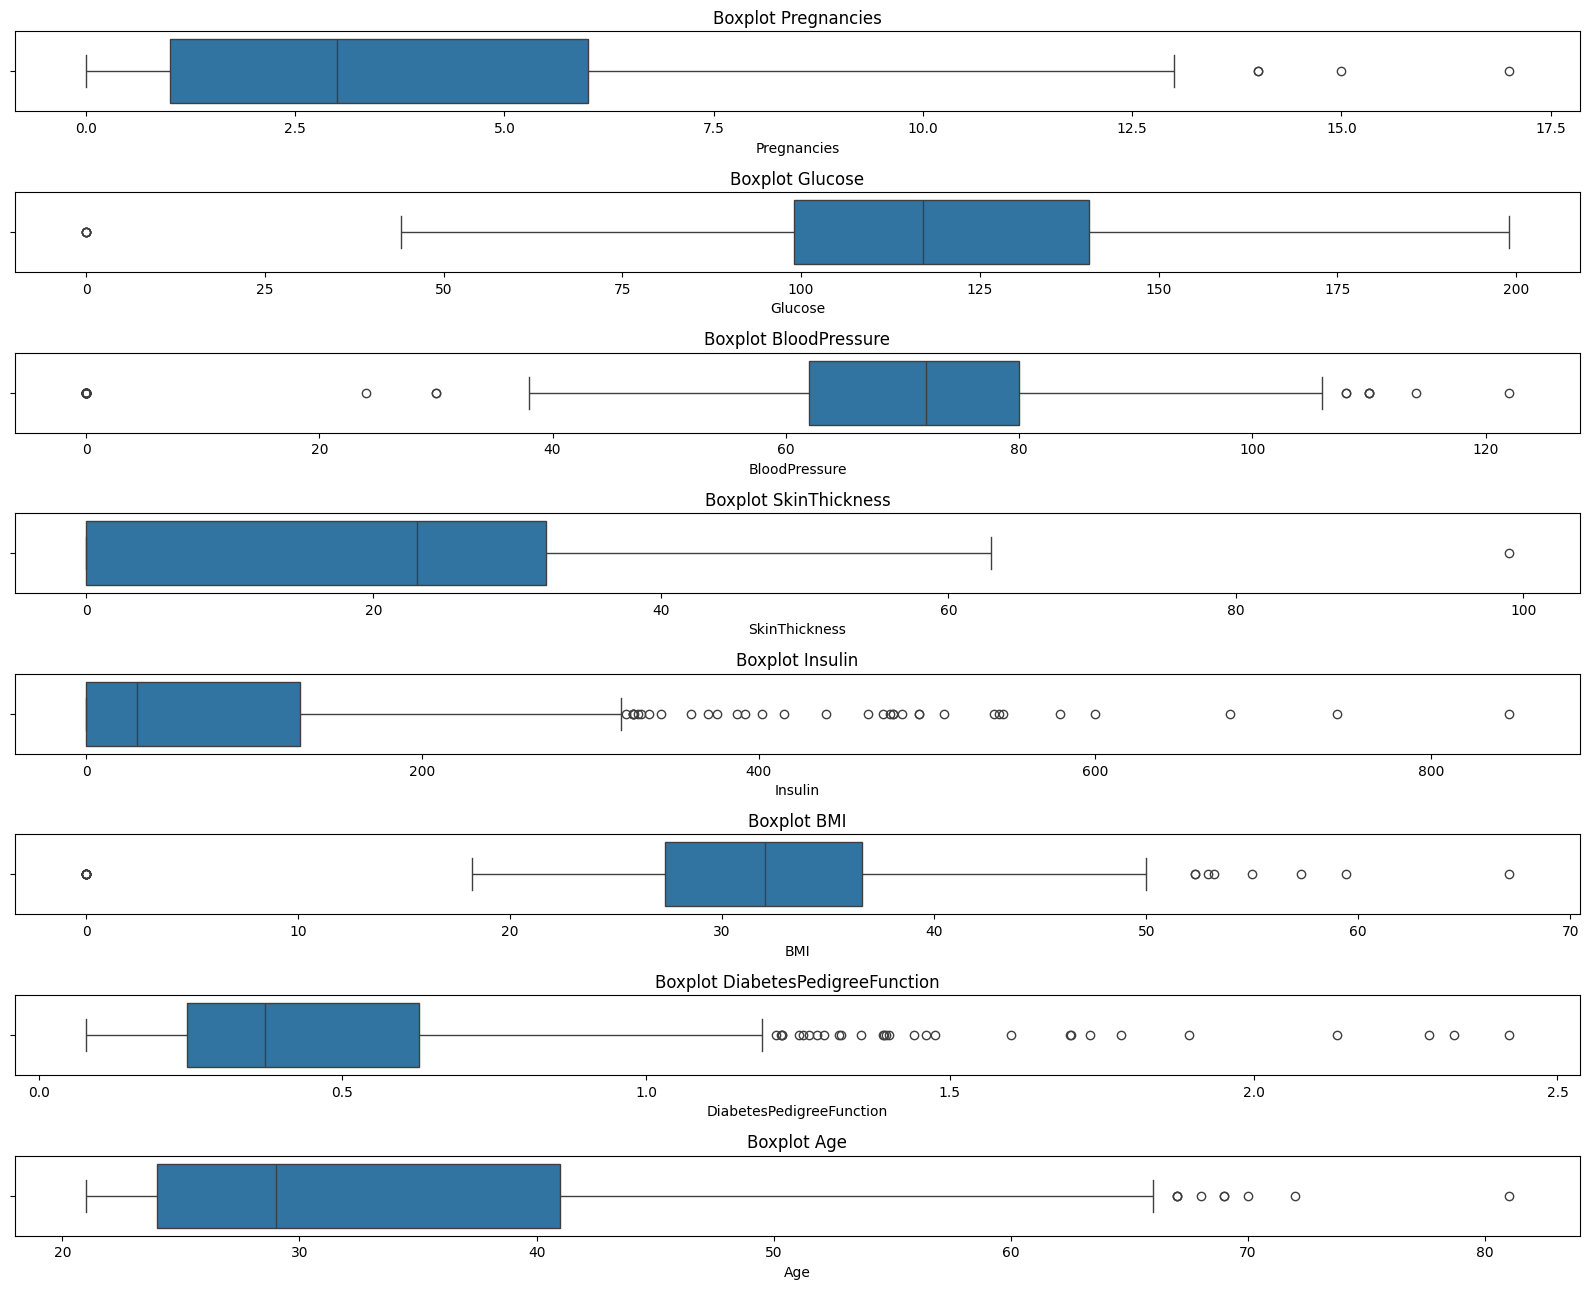

In [310]:
out_cols = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(16,13))
for i in range(len(out_cols)):
    plt.subplot(8,1,i+1)
    sns.boxplot(x=df[out_cols[i]])
    plt.tight_layout()    
    plt.title('Boxplot {}'.format(out_cols[i]))

### Interprestasi Hasil Outlier Checking Boxplot Visualize
- Dalam boxplot `Pregnancies`: Grafik memperlihatkan outlier untuk jumlah kehamilan 13.0, 15.0, 17.0
    - Tidak di hapus karena ada kemungkinan seorang ibu hamil dalam range 13-17 kali
- Dalam Boxplot `Glucose`: tampaknya terdapat glucose 0 sebagai outlier
    - Di hapus karena data tersebut outlier, tidak ada orang memiliki kadar glukosa 0
- Dalam Boxplot `Blood Pressure`: Grafik memperlihatkan outlier untuk 0,21,23, 110 - 120
    - Normal karena tekanan darah di bawah 30 itu termasuk hipotensi dan di 110-120 bisa di bilang normal
- Dalam Boxplot `SkinThickness`: Grafik memperlihatkan outlier dengan hasil sebesar 100
    - tidak di hapus karena ketebalan kulit seseorang bervariasi
- Dalam Boxplot `Insulin`: Kadar Insulin menunjukan fluktuasi yang cukup tinggi.
    - tidak di hapus karena kadar inslusin cukup bervariasi fluktuatif
- Dalam Boxplot: `BMI`: Beberapa data memiliki fluktuasi BMI cukup tinggi
    - Tidak di hapus karena BMI pada penderita diabetes emang di harapkan lebih tinggi karena kelebihan makan dan tidak ideal
- Dalam Boxplot: `DiabetesPedigreFunction`: Mengandung nilai yang bervariasi tergantung dari riwayat masing masing keluarga
    - Tidak di hapus karena riwayat keluarga tersebut bervariasi
- Dalam Boxplot: `Age`: terdapat outlier pada usia yg tua
    - Nilai pada usia diatas 65 emang ada untuk beberapa jadi tidak di hapus.

### 4.2. Delete Outlier

- Karena tidak ada aksi untuk penghapusan data outluer sehingga metode interquartile tidak dilakukan

In [311]:
# quartile_1 = df.quantile(0.25)
# quartile_3 = df.quantile(0.75)

# Interquartile = quartile_1 - quartile_3
# df = df[~((df < (quartile_1 - 1.5 * Interquartile)) | (df > (quartile_3 + 1.5 * Interquartile))).any(axis=1)]

- penghapusan glucose, bloodpleasure, BMI, Skin Thickness, Insulin=> 0

In [312]:
df = df.loc[(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]!=0).all(axis=1)]

In [313]:
print(df['Glucose'][df['Glucose'] == 0])
print(df['BloodPressure'][df['BloodPressure'] == 0])
print(df['BMI'][df['BMI'] == 0])
print(df['Insulin'][df['Insulin']==0])
print(df['SkinThickness'][df['SkinThickness']==0])

Series([], Name: Glucose, dtype: int64)
Series([], Name: BloodPressure, dtype: int64)
Series([], Name: BMI, dtype: float64)
Series([], Name: Insulin, dtype: int64)
Series([], Name: SkinThickness, dtype: int64)


# 5. Univariate Analysis

In [314]:
num_fitur = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cat_fitur = ['Pregnancies', 'Outcome']

## Categorical

### 5.1. Fitur Pregnancies

             Count Fitur  Percent
Pregnancies                      
1                     93    23.72
2                     64    16.33
0                     56    14.29
3                     45    11.48
4                     27     6.89
5                     21     5.36
7                     20     5.10
6                     19     4.85
8                     14     3.57
9                     11     2.81
10                     6     1.53
12                     5     1.28
11                     5     1.28
13                     3     0.77
15                     1     0.26
17                     1     0.26
14                     1     0.26


<Axes: title={'center': 'Pregnancies'}, xlabel='Pregnancies'>

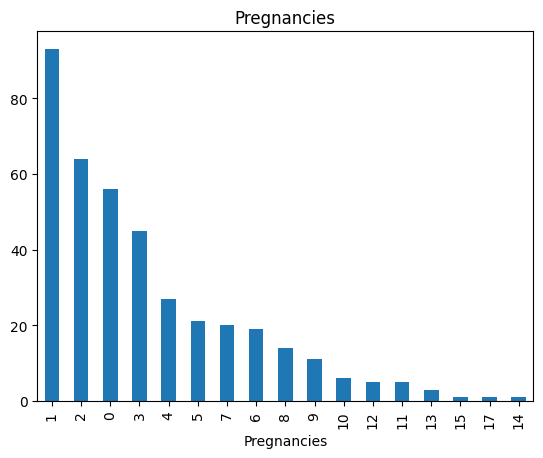

In [315]:
fitur_pregnancies = cat_fitur[0]
count_fitur = df[fitur_pregnancies].value_counts()
percent_fitur = 100 * df[fitur_pregnancies].value_counts(normalize=True)
df_pregnancies = pd.DataFrame({'Count Fitur': count_fitur, 'Percent': percent_fitur.round(2)})
print(df_pregnancies)
count_fitur.plot(kind='bar', title=fitur_pregnancies)

- Dikarenakan Pregnancies tidak memiliki korelasi yang cukup signifikan maka akan di drop pada saat split data

### 5.2. Fitur Outcome

         Count Fitur  Percent
Outcome                      
0                262    66.84
1                130    33.16


<Axes: title={'center': 'Outcome'}, xlabel='Outcome'>

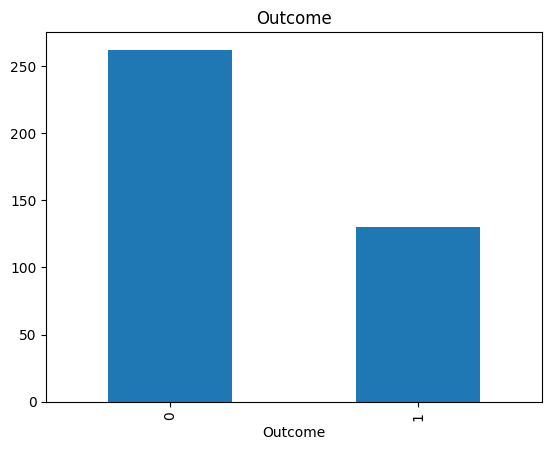

In [316]:
fitur_outcome = cat_fitur[1]
count_outcome = df[fitur_outcome].value_counts()
percent_fitur = 100 * df[fitur_outcome].value_counts(normalize=True)
df_outcome = pd.DataFrame({'Count Fitur': count_outcome, 'Percent': percent_fitur.round(2)})
print(df_outcome)
count_outcome.plot(kind='bar', title=fitur_outcome)

## Numerical

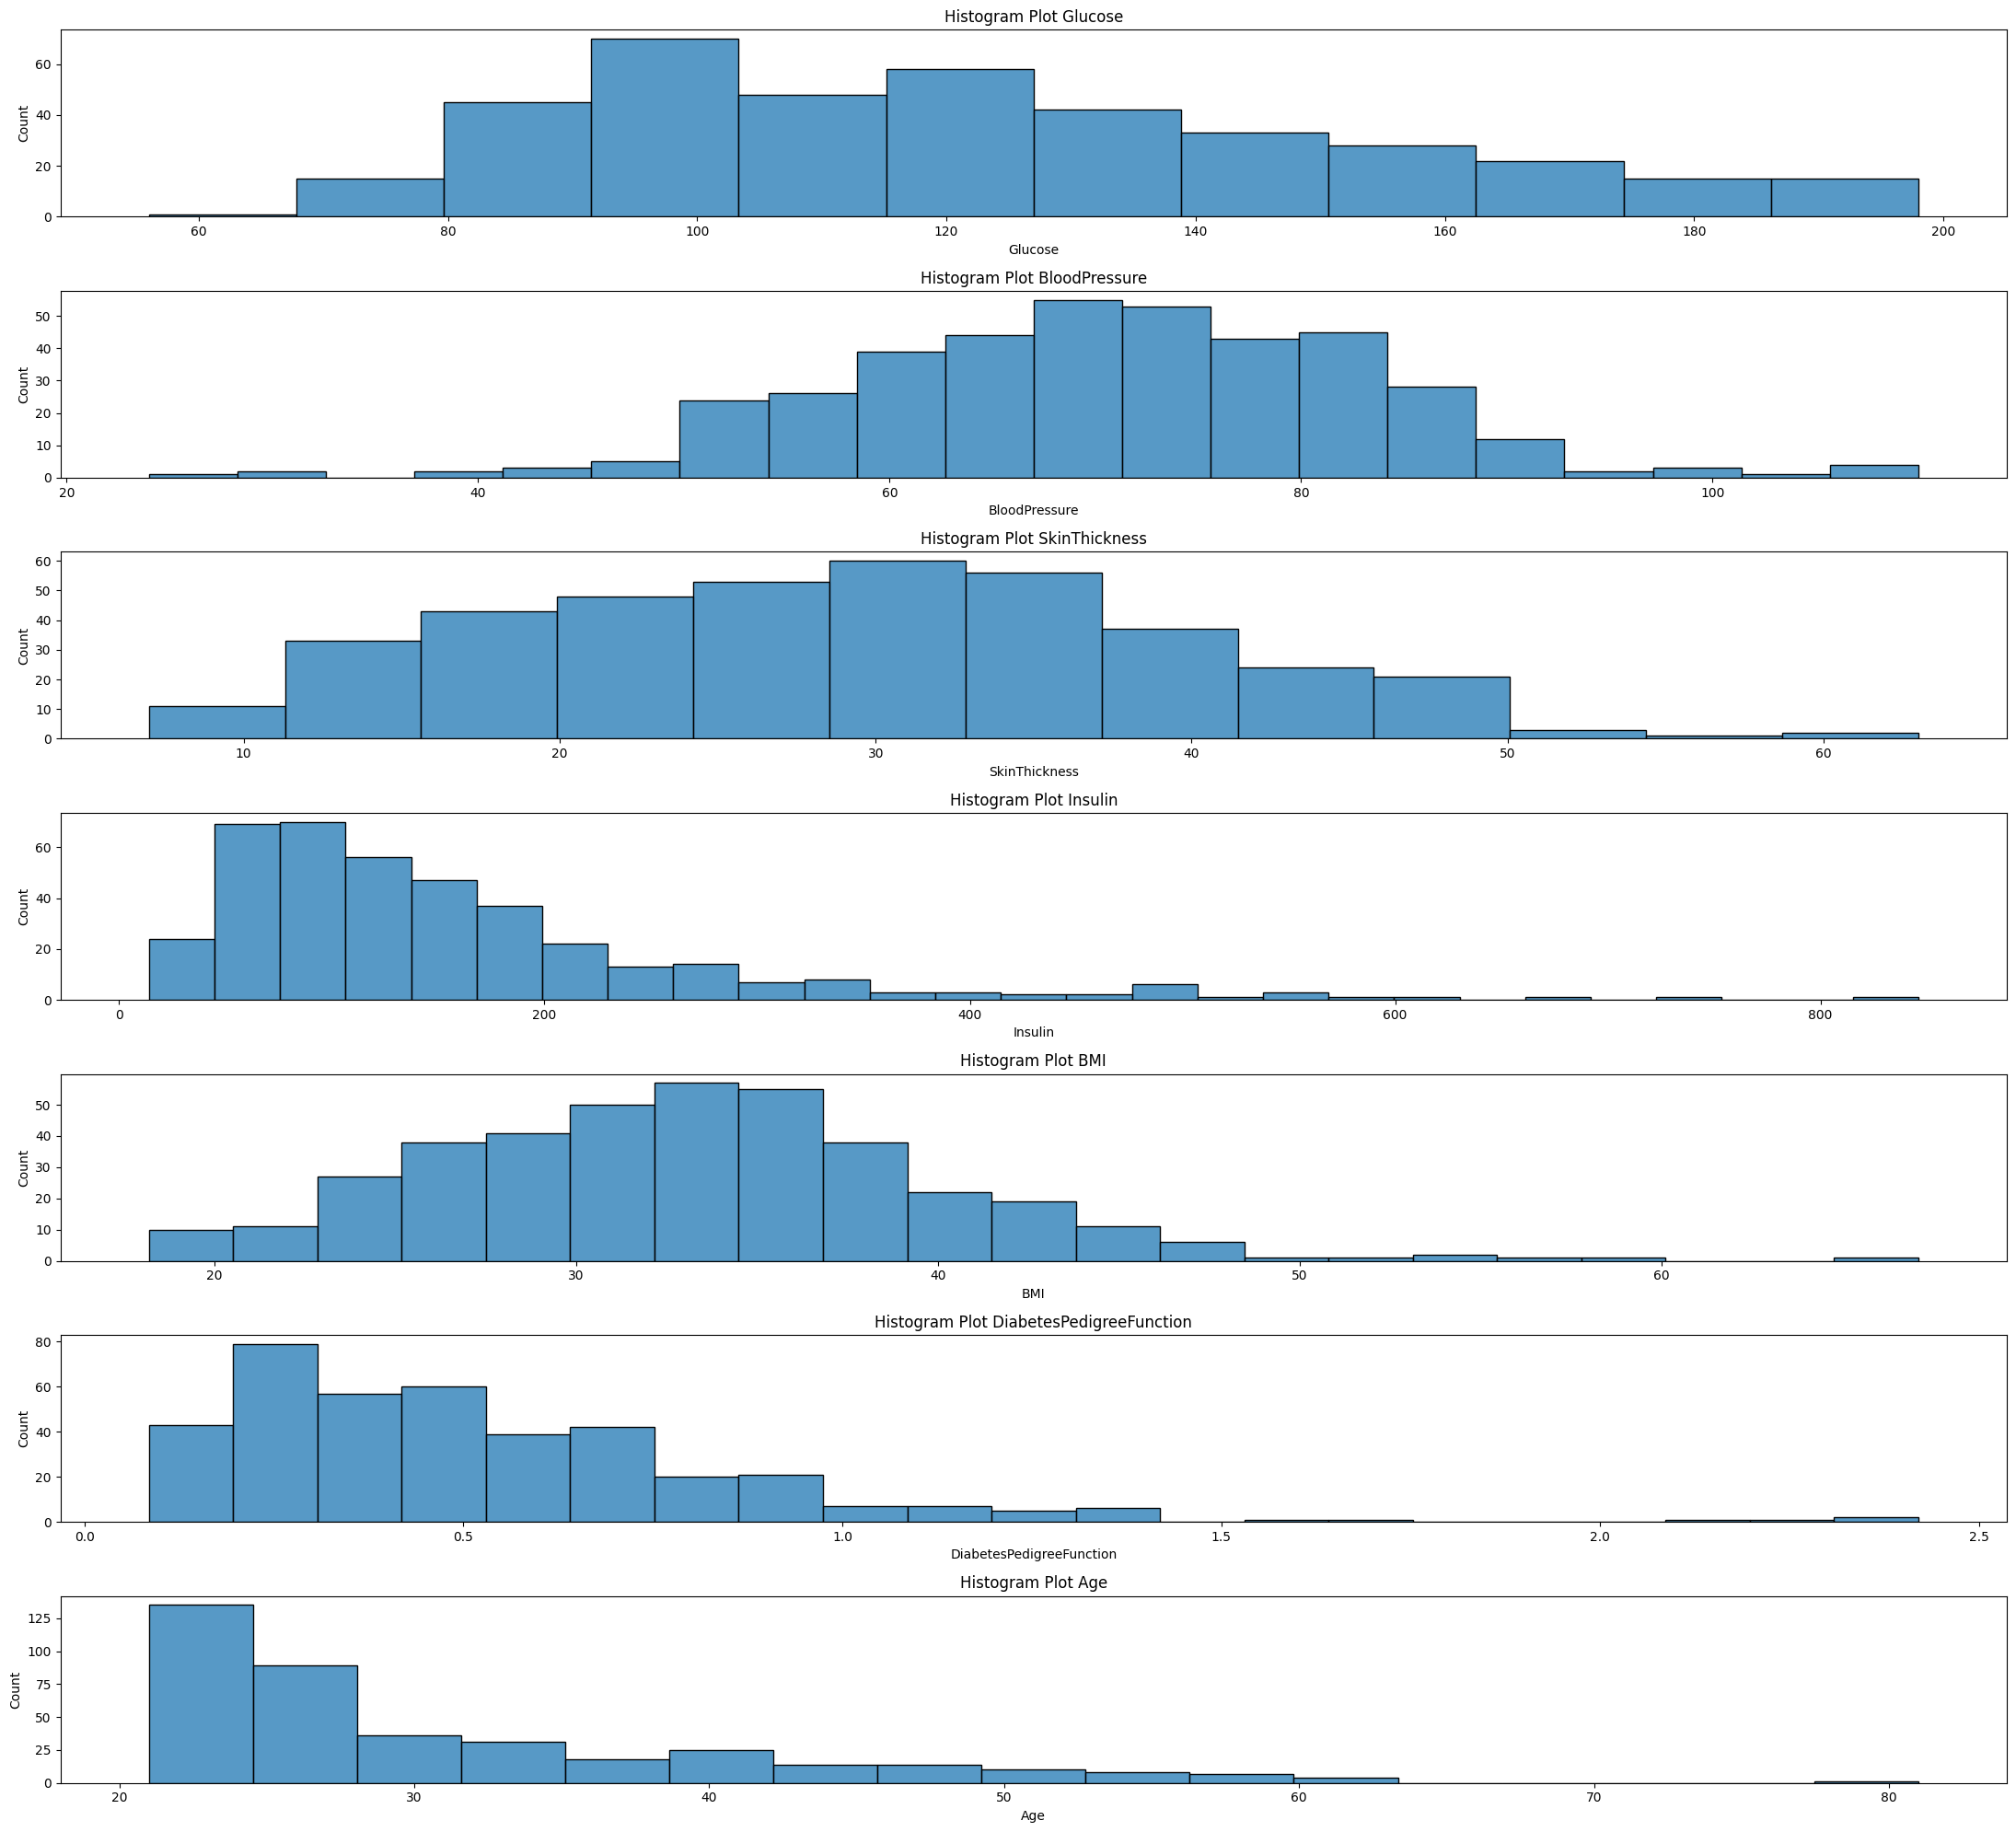

In [317]:
plt.figure(figsize= (22,20))
for i in range(len(num_fitur)):
    plt.subplot(len(num_fitur), 1, i+1)
    sns.histplot(x=df[num_fitur[i]])
    plt.title('Histogram Plot {}'.format(num_fitur[i]))
    plt.tight_layout()

- Meaning Histogram:
    - Beberapa kolom berdistribusi right-skewed
    - Normaly distribution : Glucose, BloodPressure, SkinThickness, BMI

# 6. Multivariate Analysis

## 6.1. Korelasi Numerical fitur dengan `Outcome`

In [318]:
num_fitur

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

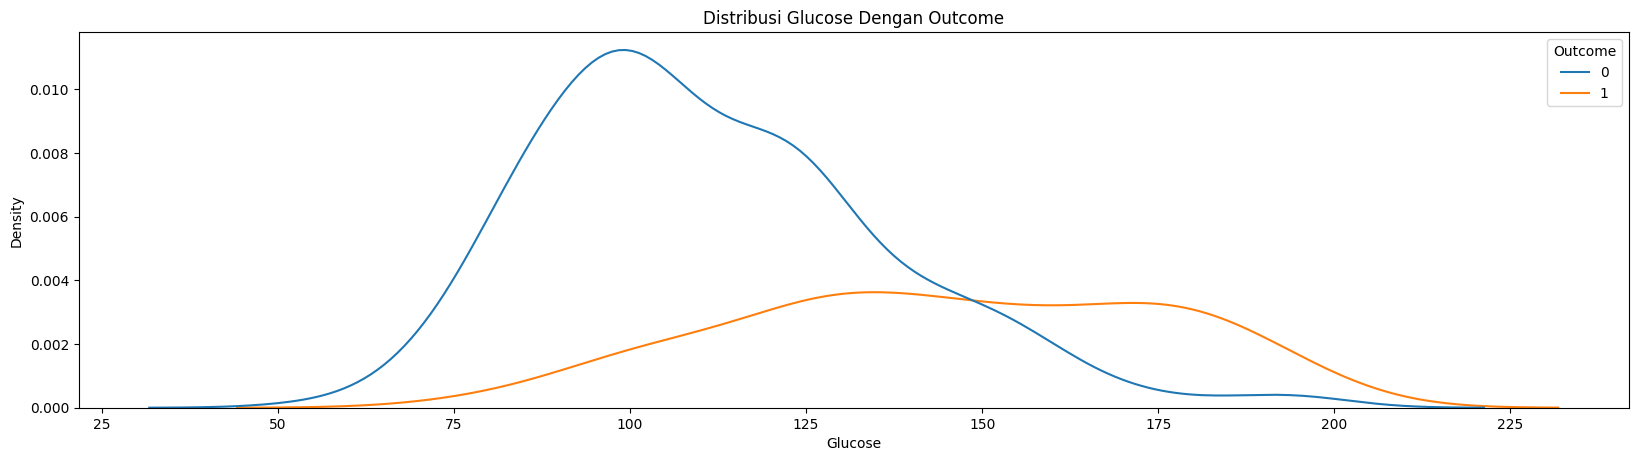

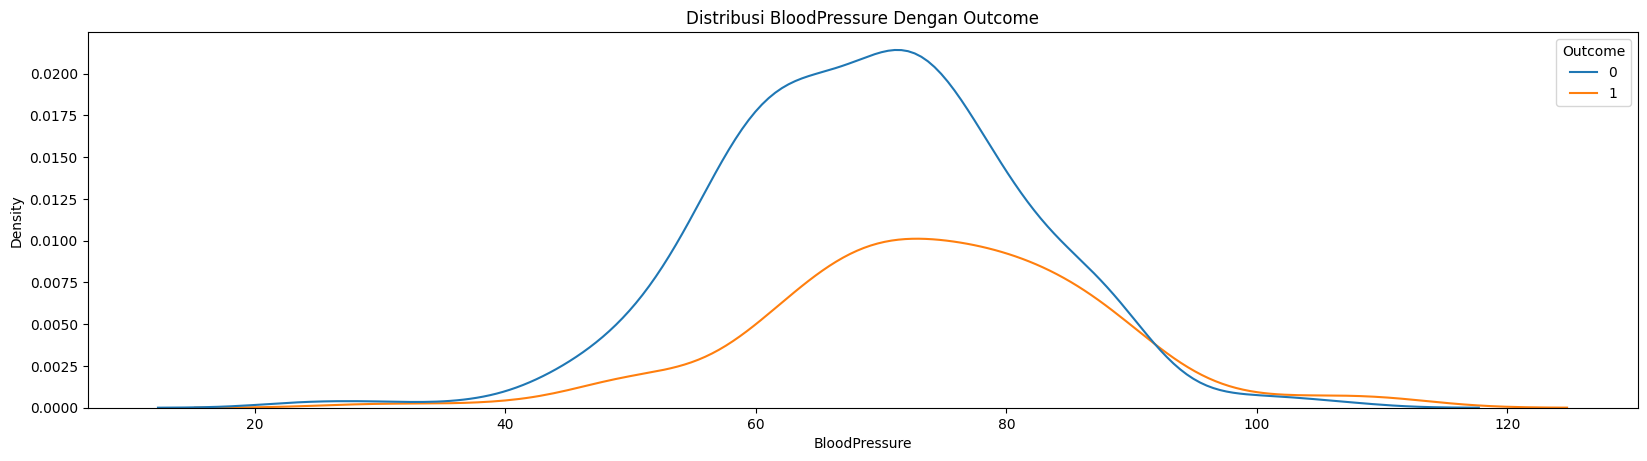

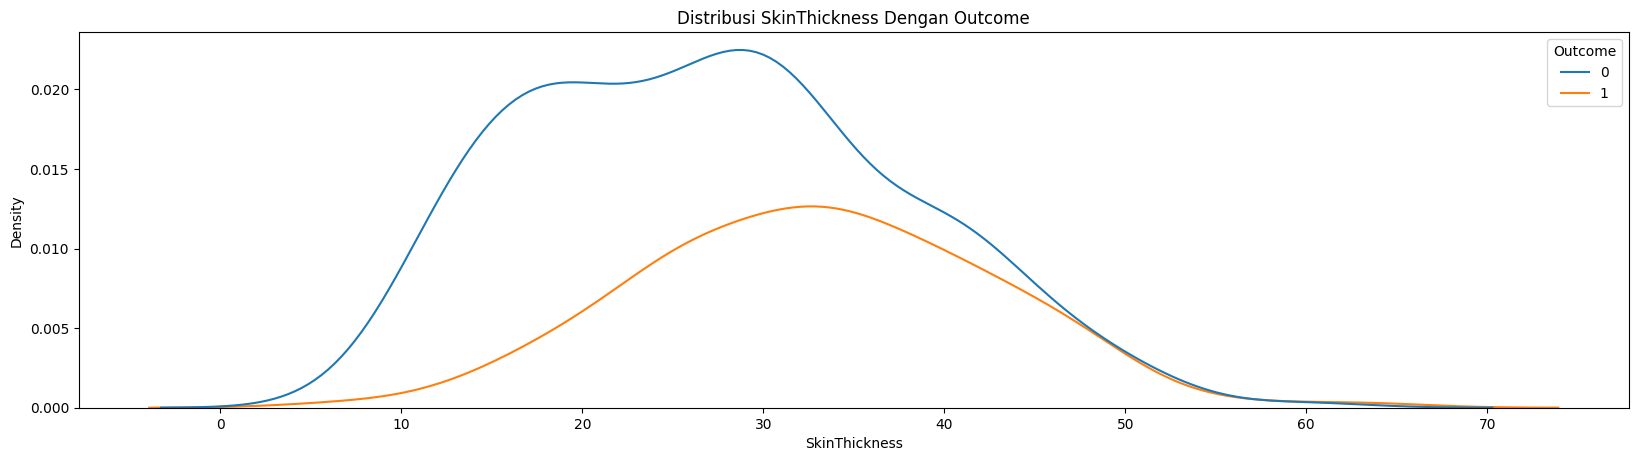

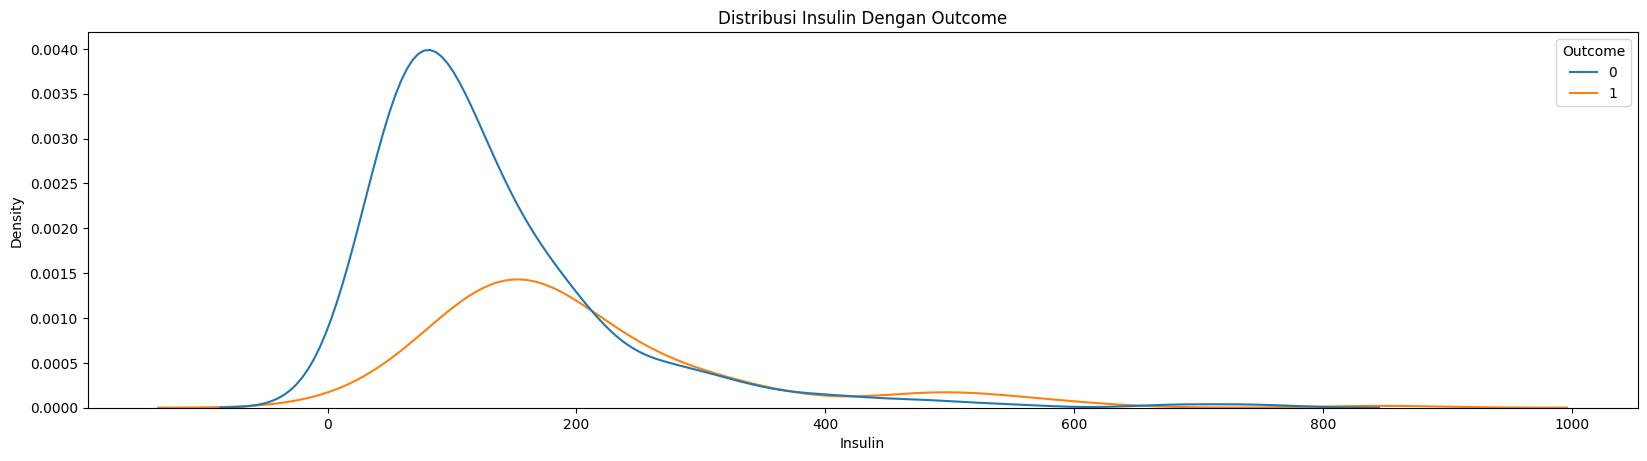

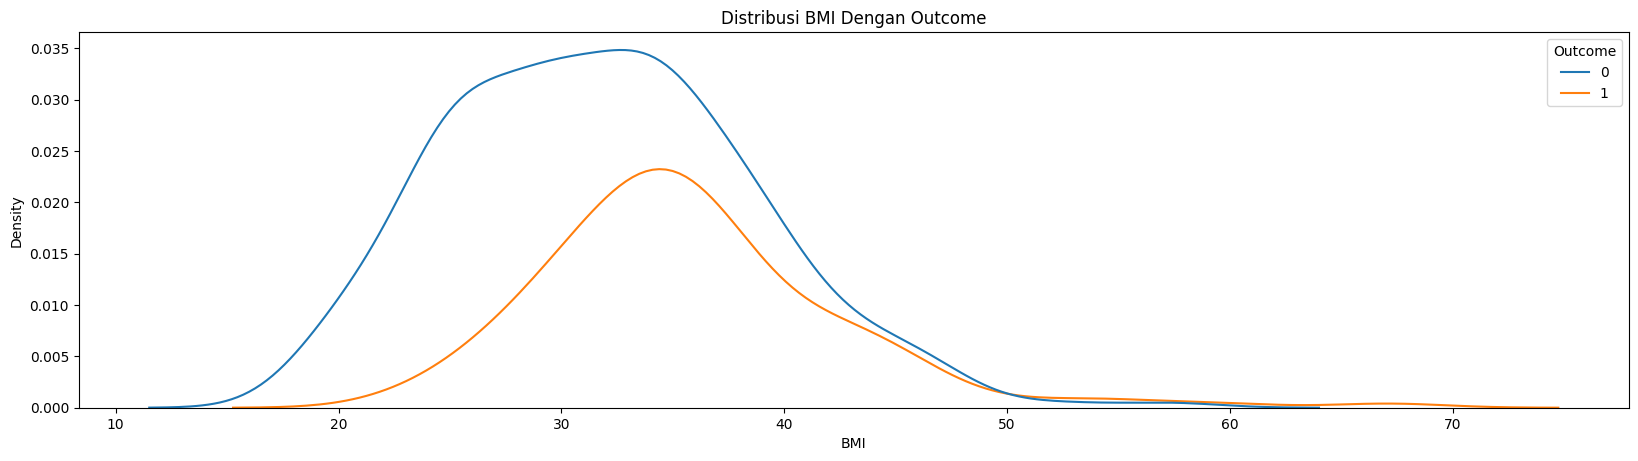

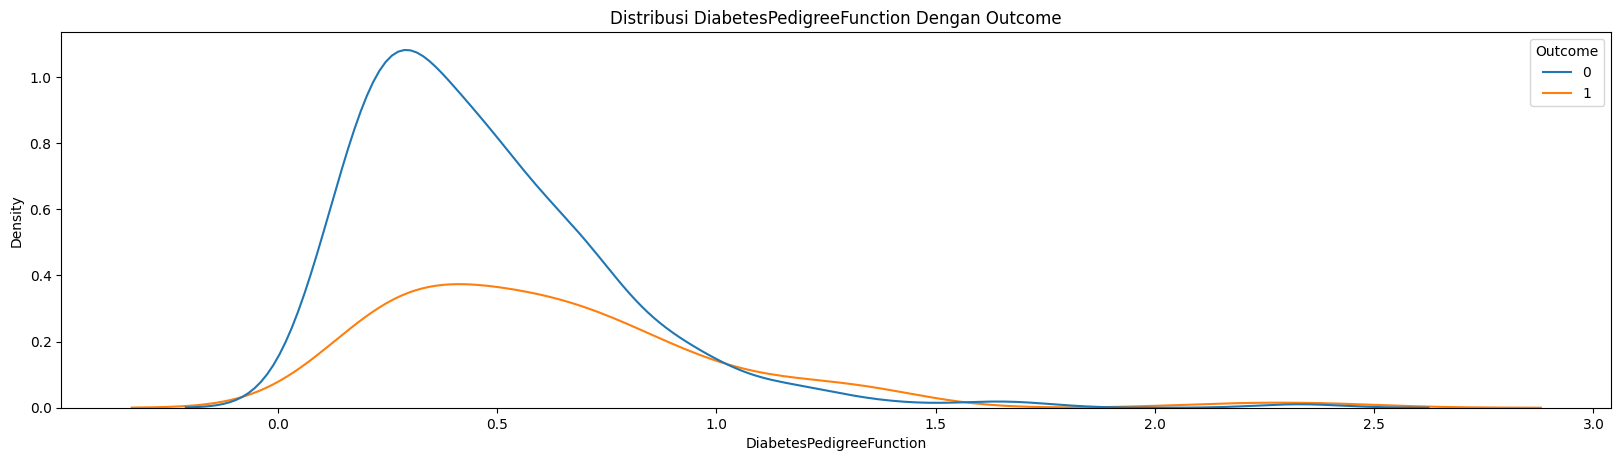

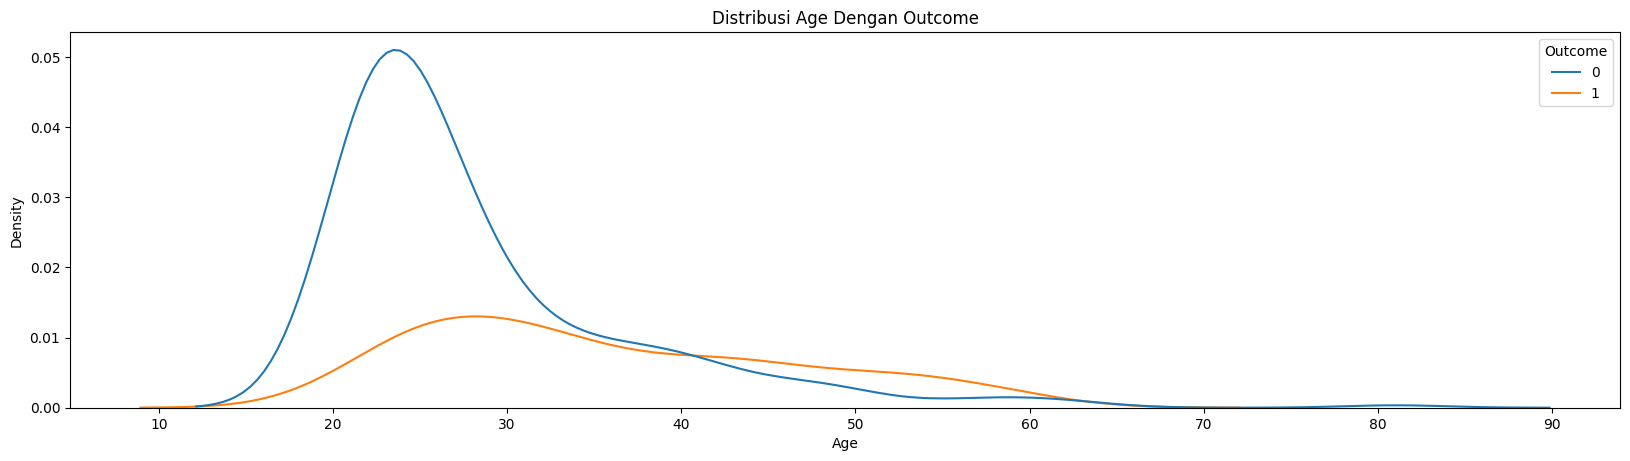

In [319]:
for i in range(len(num_fitur)):
    plt.figure(figsize=(20,40))
    plt.subplot(len(num_fitur), 1, i+1)
    sns.kdeplot(x=df[num_fitur[i]], hue='Outcome', data=df)
    plt.title('Distribusi {} Dengan Outcome'.format(num_fitur[i]))
    plt.show()
    print('\n\n')

- Meaning Plot:
    Pada data tersebut kita bisa melihat bahwa ciri ciri outcome (1/0) penderita diabetes memiliki kategori :
    - Pasien Representasi Glukosa Tinggi
    - Pasien Representasi BloodPressure Tinggi
    - Pasien Representasi BMI Tinggi
    - Pasien Representasi DiabetesPedigreeFunction Tinggi
    - Pasien Representasi Age Semakin Tua

Text(0.5, 1.0, 'Correlation with Fitur Numerical')

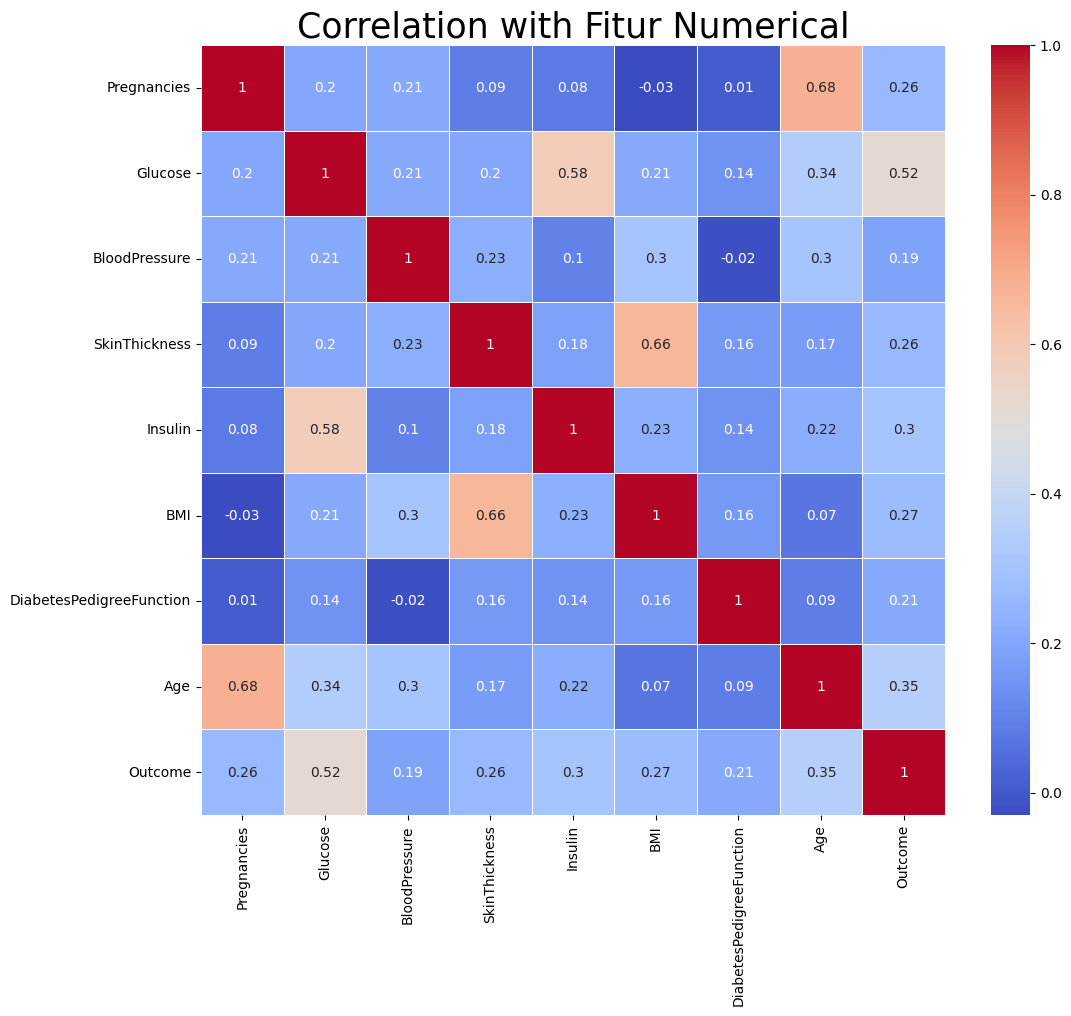

In [320]:
plt.figure(figsize=(12,10))
cor_matrix = df.corr().round(2)
sns.heatmap(data=cor_matrix, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Correlation with Fitur Numerical', size=25)

- Meaning Plot: 
    - Pada Glucose, Insulin Age BMI (0.52, 0.3, 0.35, 0.27)

# 7. Data Preparation

<Axes: xlabel='Outcome', ylabel='count'>

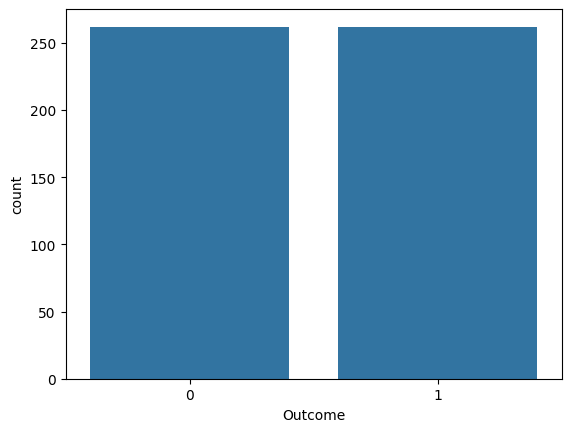

In [321]:
normal = df[(df['Outcome'] == 0)]
diabetes = df[(df['Outcome'] == 1)]

diabetes_upsample = sklearn.utils.resample(diabetes, 
                                         replace=True, 
                                         n_samples=len(normal), 
                                         random_state=42)

new_df = pd.concat([diabetes_upsample, normal])
sns.countplot(x=new_df['Outcome'])

In [322]:
def train_test_split(data, random_state=100, train_size = 0.8, ):
    # Shuffle the data
    np.random.seed(random_state)  
    shuffled_indices = np.random.permutation(len(data))
    shuffled_data = data.iloc[shuffled_indices].reset_index(drop=True)

    # Split the data into train and test
    split_idx = int(len(shuffled_data) * train_size)
    train_data = shuffled_data[:split_idx]
    test_data = shuffled_data[split_idx:]
    
    # Separate features (X) and target (y) for train and test sets
    X_train = train_data.drop(columns=['Outcome','Pregnancies'])
    y_train = train_data["Outcome"]
    
    X_test = test_data.drop(columns=['Outcome','Pregnancies'])
    y_test = test_data["Outcome"]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(df, train_size=0.8, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 7)
(79, 7)
(313,)
(79,)


# 8. Modeling
Tahapan modeling dilakukan dengan 2 metode: `Baseline Model` dan `Ensemble Model`. 
- Pada `Baseline Model` menggunakan : SVC 
- pada `Ensemble Model` menggunakan : RF dan Bagging

## 8.1. SVC

In [323]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

SVC()

## 8.2. Random Forest Classifier

In [324]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier

# buat model prediksi
RF = RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=9,random_state=42) 
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=42)

## 8.3. Bagging Classifier with Decision Tree Classifier

In [325]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=44)
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=44)

# 9. Evaluasi Performance Model

In [326]:
list_model = [svc, RF, bagging]
model_names = ['Support Vector Classifier', 'Random Forest Classifier', 'Bagging Classifier (Decision Tree)']
scores = []

for i in list_model:
    score = sklearn.model_selection.cross_val_score(i, X_train, y_train, cv=5)
    score = np.mean(score)
    scores.append(score)

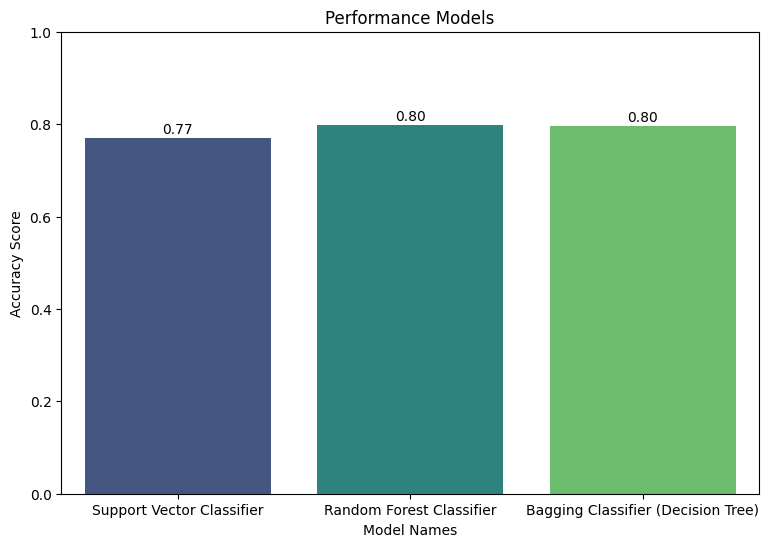

In [327]:
# Plot Performances Models
plt.figure(figsize=(9, 6))
barplot = sns.barplot(x=model_names, y=scores, hue=model_names, dodge=False, palette='viridis', legend=False)

for index, score in enumerate(scores):
    plt.text(index, score + 0.01, f"{score:.2f}", ha='center', fontsize=10, color='black')

plt.title("Performance Models")
plt.ylabel("Accuracy Score")
plt.xlabel("Model Names")
plt.ylim(0, 1)
plt.show()

In [328]:
print('Train RandomForestClassifierModel  : ' , RF.score(X_train, y_train))
print('Test RandomForestClassifierModel : ' , RF.score(X_test, y_test))

Train RandomForestClassifierModel  :  0.9968051118210862
Test RandomForestClassifierModel :  0.7721518987341772


In [329]:
print('Train SVC  : ' , svc.score(X_train, y_train))
print('Test SVC : ' , svc.score(X_test, y_test))

Train SVC  :  0.7859424920127795
Test SVC :  0.7721518987341772


In [330]:
print('Train Bagging  : ' , bagging.score(X_train, y_train))
print('Test Bagging : ' , bagging.score(X_test, y_test))

Train Bagging  :  1.0
Test Bagging :  0.759493670886076


Pada hasil yang di peroleh, di dapatkan bahwa model dengan ensemble method:
- RF dan Bagging didapatkan bahwa overfitting dengan hasil pada train sangat jauh marginnya dengan hasil pada test
- Maka dari itu disini menggunakan `SVC` yang lebih good fit walaupun secara performa diatas diperoleh lebih kecil daripada RF yakni 77%.

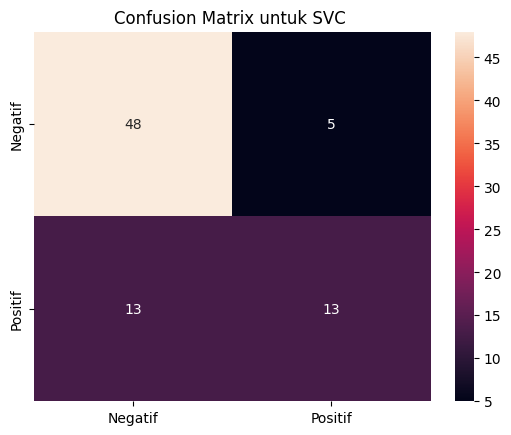

In [331]:
y_pred_svc = svc.predict(X_test)
cm_svc = sklearn.metrics.confusion_matrix(y_test,y_pred_svc)

ax=sns.heatmap(cm_svc,annot=True)
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Confusion Matrix untuk SVC ")
plt.show()

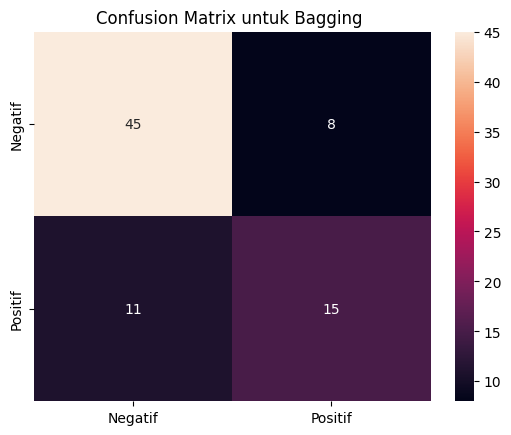

In [332]:
y_pred_bag = bagging.predict(X_test)
cm_bag = sklearn.metrics.confusion_matrix(y_test,y_pred_bag)

ax=sns.heatmap(cm_bag,annot=True)
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Confusion Matrix untuk Bagging ")
plt.show()

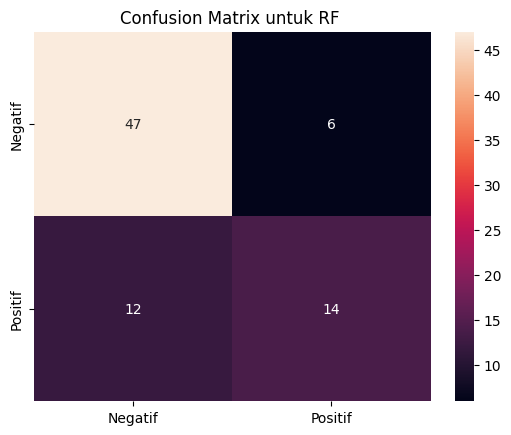

In [333]:
y_pred_rf = RF.predict(X_test)
cm_rf = sklearn.metrics.confusion_matrix(y_test,y_pred_rf)

ax=sns.heatmap(cm_rf,annot=True)
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Confusion Matrix untuk RF ")
plt.show()

In [334]:
test_score_svc = sklearn.metrics.accuracy_score(y_test,y_pred_svc)
print("Akurasi SVC : {}".format(test_score_svc))
print("-" * 100)

precision_score_svc = sklearn.metrics.precision_score(y_test,y_pred_svc)
print("Precision SVC : {}".format(precision_score_svc))
print("-" * 100)

recall_score_svc = sklearn.metrics.recall_score(y_test,y_pred_svc)
print("Recall SVC : {}".format(recall_score_svc))
print("-" * 100)

f1_score = sklearn.metrics.f1_score(y_test,y_pred_svc)
print("F1-score SVC : {}".format(f1_score))

Akurasi SVC : 0.7721518987341772
----------------------------------------------------------------------------------------------------
Precision SVC : 0.7222222222222222
----------------------------------------------------------------------------------------------------
Recall SVC : 0.5
----------------------------------------------------------------------------------------------------
F1-score SVC : 0.5909090909090909


In [335]:
test_score_bag = sklearn.metrics.accuracy_score(y_test,y_pred_bag)
print("Akurasi Bagging : {}".format(test_score_bag))
print("-" * 100)

precision_score_bag = sklearn.metrics.precision_score(y_test,y_pred_bag)
print("Precision Bagging : {}".format(precision_score_bag))
print("-" * 100)

recall_score_bag = sklearn.metrics.recall_score(y_test,y_pred_bag)
print("Recall Bagging : {}".format(recall_score_bag))
print("-" * 100)

f1_score = sklearn.metrics.f1_score(y_test,y_pred_bag)
print("F1-score Bagging : {}".format(f1_score))

Akurasi Bagging : 0.759493670886076
----------------------------------------------------------------------------------------------------
Precision Bagging : 0.6521739130434783
----------------------------------------------------------------------------------------------------
Recall Bagging : 0.5769230769230769
----------------------------------------------------------------------------------------------------
F1-score Bagging : 0.6122448979591837


In [336]:
test_score_rf = sklearn.metrics.accuracy_score(y_test,y_pred_rf)
print("Akurasi RF : {}".format(test_score_rf))
print("-" * 100)

precision_score_rf = sklearn.metrics.precision_score(y_test,y_pred_rf)
print("Precision RF : {}".format(precision_score_rf))
print("-" * 100)

recall_score_rf = sklearn.metrics.recall_score(y_test,y_pred_rf)
print("Recall RF : {}".format(recall_score_rf))
print("-" * 100)

f1_score = sklearn.metrics.f1_score(y_test,y_pred_rf)
print("F1-score RF : {}".format(f1_score))

Akurasi RF : 0.7721518987341772
----------------------------------------------------------------------------------------------------
Precision RF : 0.7
----------------------------------------------------------------------------------------------------
Recall RF : 0.5384615384615384
----------------------------------------------------------------------------------------------------
F1-score RF : 0.6086956521739131
